In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("ecommerce_train.csv")

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   session_id               40000 non-null  int64  
 1   administrative           40000 non-null  int64  
 2   administrative_duration  40000 non-null  float64
 3   informational            40000 non-null  int64  
 4   informational_duration   40000 non-null  float64
 5   productrelated           40000 non-null  int64  
 6   productrelated_duration  40000 non-null  float64
 7   bouncerates              40000 non-null  float64
 8   exitrates                40000 non-null  float64
 9   pagevalues               40000 non-null  float64
 10  specialday               40000 non-null  float64
 11  month                    40000 non-null  object 
 12  operatingsystems         40000 non-null  object 
 13  browser                  40000 non-null  object 
 14  region                

In [4]:
#test_data['time'] = pd.to_datetime(test_data['time'],format = '%I%p').dt.sec

train_data.isna().sum()

session_id                 0
administrative             0
administrative_duration    0
informational              0
informational_duration     0
productrelated             0
productrelated_duration    0
bouncerates                0
exitrates                  0
pagevalues                 0
specialday                 0
month                      0
operatingsystems           0
browser                    0
region                     0
traffictype                0
visitortype                0
weekend                    0
revenue                    0
dtype: int64

In [5]:
#Checking for unique values in categorical columns
for i in train_data.columns:
    if train_data[i].dtype == type(object):
        print(i,end=': ')
        print('\n',train_data[i].unique())
        print()

month: 
 ['Nov' 'Dec' 'May' 'June' 'Mar' 'Sep' 'Aug' 'Oct' 'Jul' 'Feb']

operatingsystems: 
 ['2' '3' '1' '4' '8' '*']

browser: 
 ['2' '1' '10' '5' '7' '4' '8' '3' '6' '*' '13']

traffictype: 
 ['2' '3' '20' '1' '4' '11' '6' '13' '5' '*' '10' '8' '15' '7' '9']

visitortype: 
 ['Returning_Visitor' 'New_Visitor' 'Other']



In [6]:
#train
operating_mode = train_data["operatingsystems"].mode()[0]
browser_Mode = train_data["browser"].mode()[0]
traffictype_Mode = train_data["traffictype"].mode()[0]


In [7]:
train_data =train_data.replace('*', np.nan)

In [8]:
#Checking for unique values in categorical columns after * replacement
for i in train_data.columns:
    if train_data[i].dtype == type(object):
        print(i,end=': ')
        print('\n',train_data[i].unique())
        print()

month: 
 ['Nov' 'Dec' 'May' 'June' 'Mar' 'Sep' 'Aug' 'Oct' 'Jul' 'Feb']

operatingsystems: 
 ['2' '3' '1' '4' '8' nan]

browser: 
 ['2' '1' '10' '5' '7' '4' '8' '3' '6' nan '13']

traffictype: 
 ['2' '3' '20' '1' '4' '11' '6' '13' '5' nan '10' '8' '15' '7' '9']

visitortype: 
 ['Returning_Visitor' 'New_Visitor' 'Other']



In [9]:
#### fill the mode to the na value
train_data["operatingsystems"] = train_data["operatingsystems"].fillna(operating_mode)
train_data["browser"] = train_data["browser"].fillna(browser_Mode)
train_data["traffictype"] = train_data["traffictype"].fillna(traffictype_Mode)

In [10]:
### Lable encoding for the visitor

In [11]:
#Checking the distribution of target variable in terms of percentage
train_data['revenue'].value_counts(normalize=True)

0    0.841725
1    0.158275
Name: revenue, dtype: float64

In [12]:
train_data['month'].unique()

array(['Nov', 'Dec', 'May', 'June', 'Mar', 'Sep', 'Aug', 'Oct', 'Jul',
       'Feb'], dtype=object)

In [13]:
train_data['month']=train_data['month'].map({'Nov':11, 'Dec':12, 'May':5, 'June':6, 'Mar':3, 'Sep':9, 'Aug':8, 'Oct':10, 'Jul':7,'Feb':2})

In [14]:
train_data

,session_id,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,visitortype,weekend,revenue
0,139957,2,47.500000,0,0.0,19,1203.480714,0.000000,0.027421,6.748509,0.0,11,2,2,3,2,Returning_Visitor,False,0
1,496587,0,0.000000,0,0.0,7,152.000000,0.000000,0.033333,0.000000,0.0,12,3,2,6,3,Returning_Visitor,False,0
2,440268,7,206.500000,1,389.9,95,4415.889952,0.000133,0.033750,2.676062,0.0,11,2,2,1,20,Returning_Visitor,False,0
3,294672,1,18.258571,0,0.0,103,8305.048706,0.004871,0.034746,6.824908,0.0,11,2,2,1,2,Returning_Visitor,True,1
4,497475,0,0.000000,0,0.0,42,1305.108333,0.016068,0.039742,0.000000,0.0,12,3,2,5,2,Returning_Visitor,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,264884,14,271.232434,1,4.0,12,270.233333,0.000000,0.007692,33.258525,0.0,10,4,1,3,5,New_Visitor,False,0
39996,238369,14,123.930000,5,38.6,160,6190.526028,0.000000,0.040557,0.000000,0.0,9,2,2,8,1,Returning_Visitor,False,0
39997,370016,0,0.000000,0,0.0,2,0.000000,0.200000,0.200000,0.000000,0.0,12,3,2,6,13,Returning_Visitor,False,0
39998,211469,0,0.000000,0,0.0,36,1193.625000,0.034617,0.069524,0.000000,0.2,5,1,1,1,4,Returning_Visitor,False,0


In [15]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
train_data['visitortype']=labelencoder.fit_transform(train_data['visitortype'])
train_data['weekend']=labelencoder.fit_transform(train_data['weekend'])

In [16]:
train_data

,session_id,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,visitortype,weekend,revenue
0,139957,2,47.500000,0,0.0,19,1203.480714,0.000000,0.027421,6.748509,0.0,11,2,2,3,2,2,0,0
1,496587,0,0.000000,0,0.0,7,152.000000,0.000000,0.033333,0.000000,0.0,12,3,2,6,3,2,0,0
2,440268,7,206.500000,1,389.9,95,4415.889952,0.000133,0.033750,2.676062,0.0,11,2,2,1,20,2,0,0
3,294672,1,18.258571,0,0.0,103,8305.048706,0.004871,0.034746,6.824908,0.0,11,2,2,1,2,2,1,1
4,497475,0,0.000000,0,0.0,42,1305.108333,0.016068,0.039742,0.000000,0.0,12,3,2,5,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,264884,14,271.232434,1,4.0,12,270.233333,0.000000,0.007692,33.258525,0.0,10,4,1,3,5,0,0,0
39996,238369,14,123.930000,5,38.6,160,6190.526028,0.000000,0.040557,0.000000,0.0,9,2,2,8,1,2,0,0
39997,370016,0,0.000000,0,0.0,2,0.000000,0.200000,0.200000,0.000000,0.0,12,3,2,6,13,2,0,0
39998,211469,0,0.000000,0,0.0,36,1193.625000,0.034617,0.069524,0.000000,0.2,5,1,1,1,4,2,0,0


In [17]:
train_data.isnull().values.any()

False

NameError: name 'LABELS' is not defined

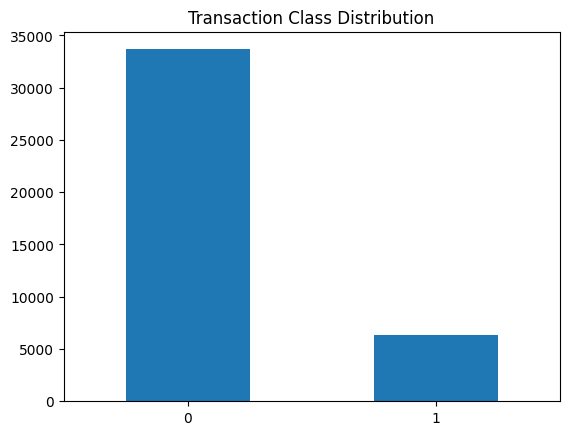

In [18]:
count_classes = pd.value_counts(train_data['revenue'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [21]:
train_data['month']=train_data['month'].astype(int)
train_data['operatingsystems']=train_data['operatingsystems'].astype(int)
train_data['browser']=train_data['browser'].astype(int)
train_data['traffictype']=train_data['traffictype'].astype(int)

In [22]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   session_id               40000 non-null  int64  
 1   administrative           40000 non-null  int64  
 2   administrative_duration  40000 non-null  float64
 3   informational            40000 non-null  int64  
 4   informational_duration   40000 non-null  float64
 5   productrelated           40000 non-null  int64  
 6   productrelated_duration  40000 non-null  float64
 7   bouncerates              40000 non-null  float64
 8   exitrates                40000 non-null  float64
 9   pagevalues               40000 non-null  float64
 10  specialday               40000 non-null  float64
 11  month                    40000 non-null  int32  
 12  operatingsystems         40000 non-null  int32  
 13  browser                  40000 non-null  int32  
 14  region                

In [23]:
X_train = train_data.drop("revenue",axis=1)
y_train = train_data["revenue"]

In [24]:
X_train 

,session_id,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,visitortype,weekend
0,139957,2,47.500000,0,0.0,19,1203.480714,0.000000,0.027421,6.748509,0.0,11,2,2,3,2,2,0
1,496587,0,0.000000,0,0.0,7,152.000000,0.000000,0.033333,0.000000,0.0,12,3,2,6,3,2,0
2,440268,7,206.500000,1,389.9,95,4415.889952,0.000133,0.033750,2.676062,0.0,11,2,2,1,20,2,0
3,294672,1,18.258571,0,0.0,103,8305.048706,0.004871,0.034746,6.824908,0.0,11,2,2,1,2,2,1
4,497475,0,0.000000,0,0.0,42,1305.108333,0.016068,0.039742,0.000000,0.0,12,3,2,5,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,264884,14,271.232434,1,4.0,12,270.233333,0.000000,0.007692,33.258525,0.0,10,4,1,3,5,0,0
39996,238369,14,123.930000,5,38.6,160,6190.526028,0.000000,0.040557,0.000000,0.0,9,2,2,8,1,2,0
39997,370016,0,0.000000,0,0.0,2,0.000000,0.200000,0.200000,0.000000,0.0,12,3,2,6,13,2,0
39998,211469,0,0.000000,0,0.0,36,1193.625000,0.034617,0.069524,0.000000,0.2,5,1,1,1,4,2,0


In [25]:
y_train

0        0
1        0
2        0
3        1
4        0
        ..
39995    0
39996    0
39997    0
39998    0
39999    0
Name: revenue, Length: 40000, dtype: int64

# TEST DATA

In [26]:
test_data = pd.read_csv("ecommerce_test.csv")

In [27]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   session_id               10000 non-null  int64  
 1   administrative           10000 non-null  int64  
 2   administrative_duration  10000 non-null  float64
 3   informational            10000 non-null  int64  
 4   informational_duration   10000 non-null  float64
 5   productrelated           10000 non-null  int64  
 6   productrelated_duration  10000 non-null  float64
 7   bouncerates              10000 non-null  float64
 8   exitrates                10000 non-null  float64
 9   pagevalues               10000 non-null  float64
 10  specialday               10000 non-null  float64
 11  month                    10000 non-null  object 
 12  operatingsystems         10000 non-null  object 
 13  browser                  10000 non-null  object 
 14  region                 

In [28]:
test_data.isna().sum()

session_id                 0
administrative             0
administrative_duration    0
informational              0
informational_duration     0
productrelated             0
productrelated_duration    0
bouncerates                0
exitrates                  0
pagevalues                 0
specialday                 0
month                      0
operatingsystems           0
browser                    0
region                     0
traffictype                0
visitortype                0
weekend                    0
dtype: int64

In [29]:
for i in test_data.columns:
    if test_data[i].dtype == type(object):
        print(i,end=': ')
        print('\n',test_data[i].unique())
        print()

month: 
 ['Nov' 'Mar' 'Dec' 'Feb' 'May' 'Jul' 'June' 'Oct' 'Aug' 'Sep']

operatingsystems: 
 ['1' '2' '3' '4' '*' '8']

browser: 
 ['2' '5' '4' '1' '3' '8' '6' '10' '7' '*' '13']

traffictype: 
 ['2' '8' '1' '11' '3' '13' '10' '4' '9' '5' '6' '20' '7' '15' '*']

visitortype: 
 ['New_Visitor' 'Returning_Visitor' 'Other']



In [30]:
#train
operating_mode = test_data["operatingsystems"].mode()[0]
browser_Mode = test_data["browser"].mode()[0]
traffictype_Mode = test_data["traffictype"].mode()[0]

In [31]:
test_data =test_data.replace('*', np.nan)

In [32]:
#Checking for unique values in categorical columns after * replacement
for i in test_data.columns:
    if test_data[i].dtype == type(object):
        print(i,end=': ')
        print('\n',test_data[i].unique())
        print()

month: 
 ['Nov' 'Mar' 'Dec' 'Feb' 'May' 'Jul' 'June' 'Oct' 'Aug' 'Sep']

operatingsystems: 
 ['1' '2' '3' '4' nan '8']

browser: 
 ['2' '5' '4' '1' '3' '8' '6' '10' '7' nan '13']

traffictype: 
 ['2' '8' '1' '11' '3' '13' '10' '4' '9' '5' '6' '20' '7' '15' nan]

visitortype: 
 ['New_Visitor' 'Returning_Visitor' 'Other']



In [33]:
#### fill the mode to the na value
test_data["operatingsystems"] = test_data["operatingsystems"].fillna(operating_mode)
test_data["browser"] = test_data["browser"].fillna(browser_Mode)
test_data["traffictype"] = test_data["traffictype"].fillna(traffictype_Mode)

In [34]:
#Checking the distribution of target variable in terms of percentage
#test_data['revenue'].value_counts(normalize=True)

In [35]:
test_data['month'].unique()

array(['Nov', 'Mar', 'Dec', 'Feb', 'May', 'Jul', 'June', 'Oct', 'Aug',
       'Sep'], dtype=object)

In [36]:
test_data['month']=test_data['month'].map({'Nov':11, 'Dec':12, 'May':5, 'June':6, 'Mar':3, 'Sep':9, 'Aug':8, 'Oct':10, 'Jul':7,'Feb':2})

In [37]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
test_data['visitortype']=labelencoder.fit_transform(test_data['visitortype'])
test_data['weekend']=labelencoder.fit_transform(test_data['weekend'])

In [38]:
test_data['month']=test_data['month'].astype(int)
test_data['operatingsystems']=test_data['operatingsystems'].astype(int)
test_data['browser']=test_data['browser'].astype(int)
test_data['traffictype']=test_data['traffictype'].astype(int)

In [39]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   session_id               10000 non-null  int64  
 1   administrative           10000 non-null  int64  
 2   administrative_duration  10000 non-null  float64
 3   informational            10000 non-null  int64  
 4   informational_duration   10000 non-null  float64
 5   productrelated           10000 non-null  int64  
 6   productrelated_duration  10000 non-null  float64
 7   bouncerates              10000 non-null  float64
 8   exitrates                10000 non-null  float64
 9   pagevalues               10000 non-null  float64
 10  specialday               10000 non-null  float64
 11  month                    10000 non-null  int32  
 12  operatingsystems         10000 non-null  int32  
 13  browser                  10000 non-null  int32  
 14  region                 

# TRAINING THE MODEL

In [40]:
X_train = train_data.drop("revenue",axis=1)
y_train = train_data["revenue"]

In [41]:
X_test = test_data

# Cross Validation Like KFOLD and Hyperparameter Tuning

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV

In [63]:
log_class=LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [64]:
clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train,y_train)

C:\Users\heena\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\heena\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\heena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\heena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Valu

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [65]:
y_pred=clf.predict(X_test)

In [66]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [100]:
pd.DataFrame(y_pred).to_csv("KFOLD.csv",index=False,header=False)

In [101]:
#submission
data_test=pd.read_csv('ecommerce_test.csv')
submission = pd.DataFrame({
        "session_id": data_test["session_id"],
        "Y": y_pred
    })

submission.to_csv('submission.csv', index=False)
submission

,session_id,Y
0,283149,0
1,253020,0
2,348435,0
3,299763,0
4,195120,0
...,...,...
9995,278347,1
9996,498240,0
9997,296710,0
9998,226309,0


# RandomForestClassifier

In [67]:
class_weight=dict({0:1,1:100})

In [68]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(class_weight=class_weight)
classifier.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 100})

In [70]:
y_pred3=classifier.predict(X_test)

In [71]:
y_pred3

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Ensemble Techniques

In [90]:
from imblearn.ensemble import EasyEnsembleClassifier

In [92]:
easy=EasyEnsembleClassifier()

In [93]:
easy.fit(X_train,y_train)

EasyEnsembleClassifier()

In [94]:
y_pred4=easy.predict(X_test)

# SMOTETomek

In [96]:
from imblearn.combine import SMOTETomek

In [98]:
os=SMOTETomek()

In [ ]:
SMOTETomek(
    *,
    sampling_strategy='auto',
    random_state=None,
    smote=None,
    tomek=None,
    n_jobs=None,
)

In [99]:
X_train_ns,y_train_ns=os.fit_sample(X_train,y_train)

AttributeError: 'SMOTETomek' object has no attribute 'fit_sample'